<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('calonpembeli_ch5.csv')
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [2]:
df = df[df['Usia'] <= 100]
df.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [3]:
df['Beli_Mobil'].value_counts()

1    633
0    365
Name: Beli_Mobil, dtype: int64

In [5]:
import sklearn.model_selection as ms

X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
import sklearn.linear_model as lm

model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
print(model.coef_)

[[-0.01594363 -0.17093161 -1.03941674  0.07720416  0.05686701]]


In [8]:
y_prediksi = model.predict(X_test)
y_prediksi

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1])

In [10]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [12]:
y_test.head(2)

272    1
727    0
Name: Beli_Mobil, dtype: int64

## **Confusion Matrix**

In [18]:
import sklearn.metrics as met 
confusionMatrix = met.confusion_matrix(y_test, y_prediksi)
confusionMatrix

array([[ 59,   4],
       [  5, 132]])

In [15]:
score = model.score(X_test, y_test)
score

0.955

## **Precision**

In [16]:
precision = met.precision_score(y_test, y_prediksi)
precision

0.9705882352941176

## **ROC Curve**

In [17]:
auc = met.roc_auc_score(y_test, y_prediksi)
auc

0.9500057930714866

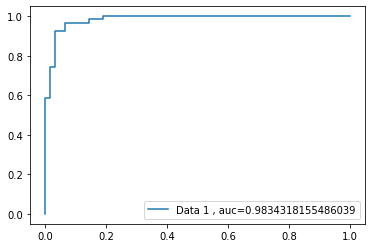

In [19]:
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp, tp, label='Data 1 , auc='+str(auc))
plt.legend(loc=4)
plt.show()

## **Feature Selection**

In [24]:
import sklearn.feature_selection as fs

rfe = fs.RFE(model)
rfe = rfe.fit(X_train, y_train)
print('Support = ', rfe.support_)
print('Ranking = ', rfe.ranking_)



Support =  [False  True  True False False]
Ranking =  [4 1 1 3 2]
